In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
colnames = ["date",'plot','location','trt','rep','irrigated','fertilizer','crop','yield', 'year']
data = pd.read_csv('data.csv', names=colnames, header=None)

In [3]:
data.head()

,date,plot,location,trt,rep,irrigated,fertilizer,crop,yield,year
0,1999-10-13,901,A,8,1,f,246.0,Zea mays L. (*),3482.0,1999
1,1999-10-13,902,A,3,1,f,67.0,Zea mays L. (*),3835.0,1999
2,1999-10-13,903,A,7,1,f,202.0,Zea mays L. (*),3018.0,1999
3,1999-10-13,904,A,4,1,f,101.0,Zea mays L. (*),3632.0,1999
4,1999-10-13,905,A,9,1,f,291.0,Zea mays L. (*),4430.0,1999


In [4]:
data.tail()

,date,plot,location,trt,rep,irrigated,fertilizer,crop,yield,year
1335,2019-07-25,805,D,8,4,t,NaN,Triticum aestivum L. (*),7451.0,2019
1336,2019-07-25,806,D,2,4,t,NaN,Triticum aestivum L. (*),2975.0,2019
1337,2019-07-25,807,D,3,4,t,NaN,Triticum aestivum L. (*),4249.0,2019
1338,2019-07-25,808,D,7,4,t,NaN,Triticum aestivum L. (*),6864.0,2019
1339,2019-07-25,809,D,9,4,t,NaN,Triticum aestivum L. (*),7606.0,2019


Dataset Abstract: This study provides a gradient of 9 different rates of nitrogen fertilization 
under rainfed and irrigated conditions. Irrigation began in 2003. Corn was grown from 2000-2005 and 
subsequently the crop rotation (wheat, corn, soybean) followed the crop of the LTER main site. 
Nitrogen applications differ by crop after 2007. The experiment was moved to its current location on the LTER main site in 2005.
The experiment location/history are explained here. Plots are 5×30 m arranged in each of 4 replicate blocks . 
Crop yields, nitrous oxide and soil temperature, moisture and nitrogen data are available for this study. 

In [5]:
# DATA
# 1. Develop a model to predict yield (dependent) using 
#    independent variables such as location, trt, rep, irrigation, fertilizer and crop
# 2. Categorical variables (6) : location, trt, rep, irrigated, crop, year
#    Numerical variable (1) : Fertilizer

In [6]:
# 5. what extra information is not included that could affect the output
# a) missing yield and fertilizer data which cannot be replaced with any number
# b) unbalanced data for location and crop

In [7]:
# 3. Number of features & number of rows
data.shape

(1340, 10)

<AxesSubplot:>

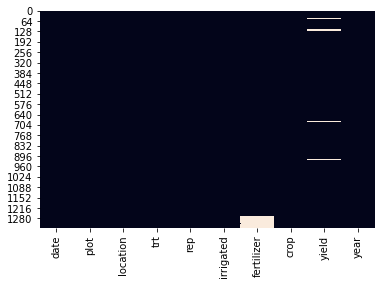

In [8]:
sns.heatmap(data.isnull(), cbar=False)

In [9]:
data['fertilizer'].unique()

array([246.,  67., 202., 101., 291.,  34., 134., 168.,   0.,  22.,  45.,
        90., 112., 157., 179.,  17.,  50.,  84., 123., 146.,  nan])

In [10]:
# 4. Missing information
data.isnull().sum()

date           0
plot           0
location       0
trt            0
rep            0
irrigated      0
fertilizer    72
crop           0
yield         16
year           0
dtype: int64

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1340 entries, 0 to 1339
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        1340 non-null   object 
 1   plot        1340 non-null   int64  
 2   location    1340 non-null   object 
 3   trt         1340 non-null   int64  
 4   rep         1340 non-null   int64  
 5   irrigated   1340 non-null   object 
 6   fertilizer  1268 non-null   float64
 7   crop        1340 non-null   object 
 8   yield       1324 non-null   float64
 9   year        1340 non-null   int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 104.8+ KB


In [12]:
data= data.dropna() 
data.describe()

,plot,trt,rep,fertilizer,yield,year
count,1252.000000,1252.000000,1252.000000,1252.000000,1252.000000,1252.000000
mean,440.459265,5.003994,2.488818,102.337859,6835.968850,2008.824281
std,230.713537,2.579043,1.118425,91.808859,3569.260412,4.959415
min,101.000000,1.000000,1.000000,0.000000,1101.000000,1999.000000
25%,208.000000,3.000000,1.000000,0.000000,3920.750000,2005.000000
50%,407.000000,5.000000,2.000000,90.000000,5547.500000,2009.000000
75%,608.000000,7.000000,3.000000,168.000000,9294.750000,2013.000000
max,909.000000,9.000000,4.000000,291.000000,17578.000000,2017.000000


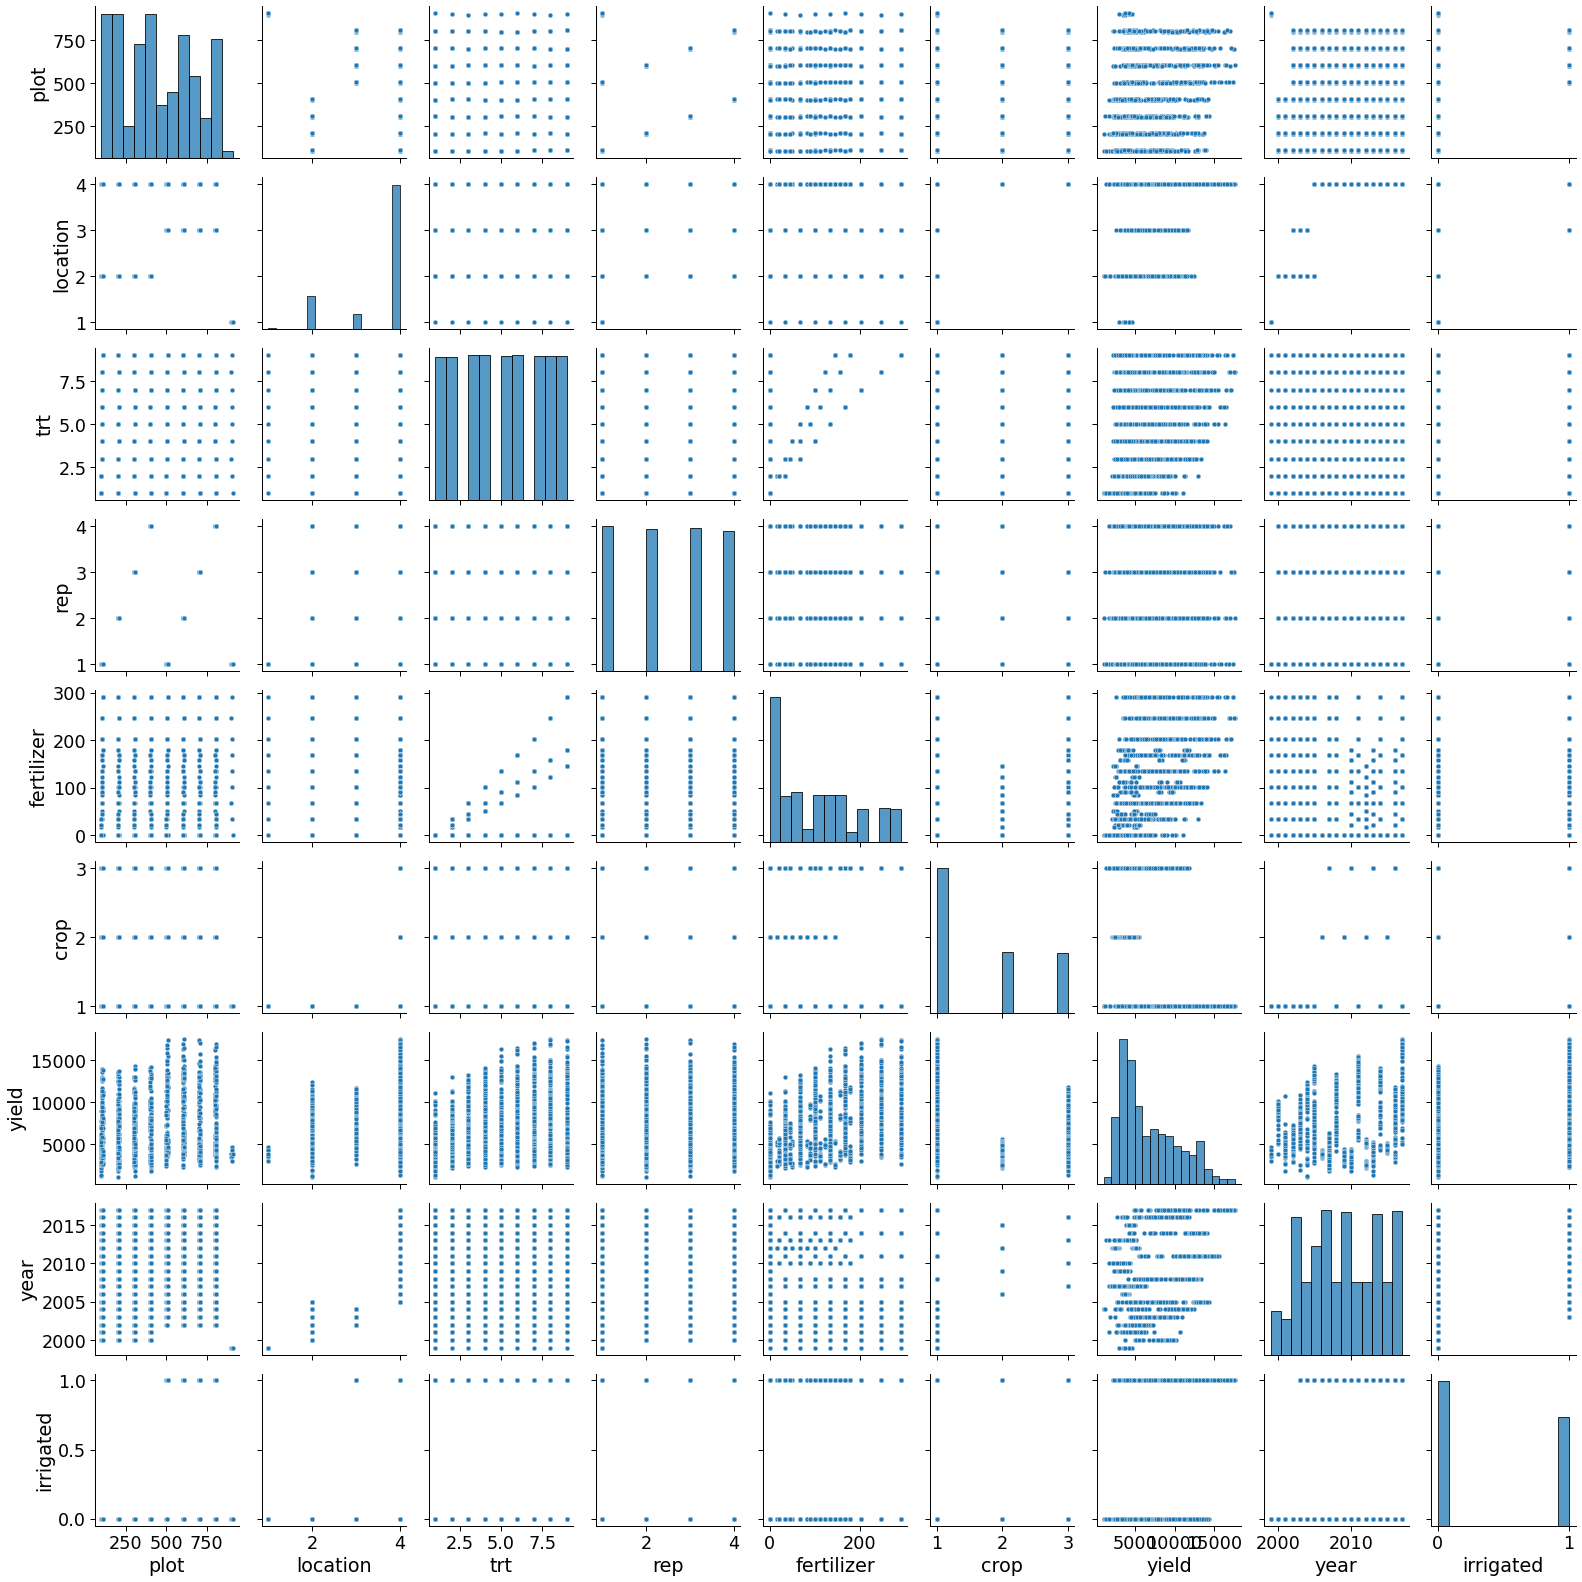

In [40]:
from pandas.plotting import scatter_matrix
sns.pairplot(data)
plt.show()

In [13]:
data['crop'].unique()

array(['Zea mays L. (*)', 'Glycine max L. (*)',
       'Triticum aestivum L. (*)'], dtype=object)

In [14]:
data['location'].unique()

array(['A', 'B', 'C', 'D'], dtype=object)

In [15]:
data['irrigated'].unique()

array(['f', 't'], dtype=object)

In [16]:
# 6. visualizations

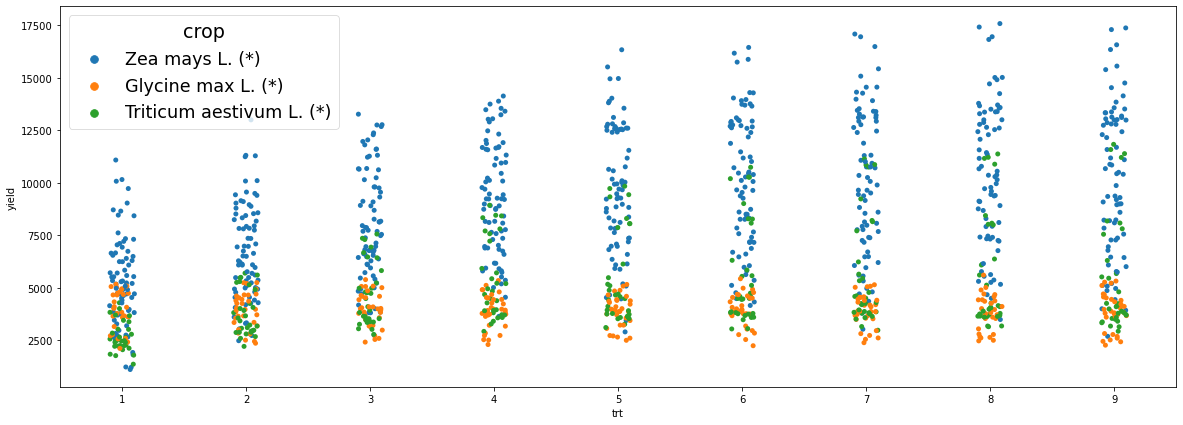

In [17]:
# trt vs yield of different crops
fig_dims = (20, 7)
fig, ax = plt.subplots(figsize=fig_dims)
sns.set_context("paper", font_scale = 2, rc={"grid.linewidth": 1})
b=sns.stripplot(x = "trt", y = "yield",hue="crop", ax=ax, data=data)

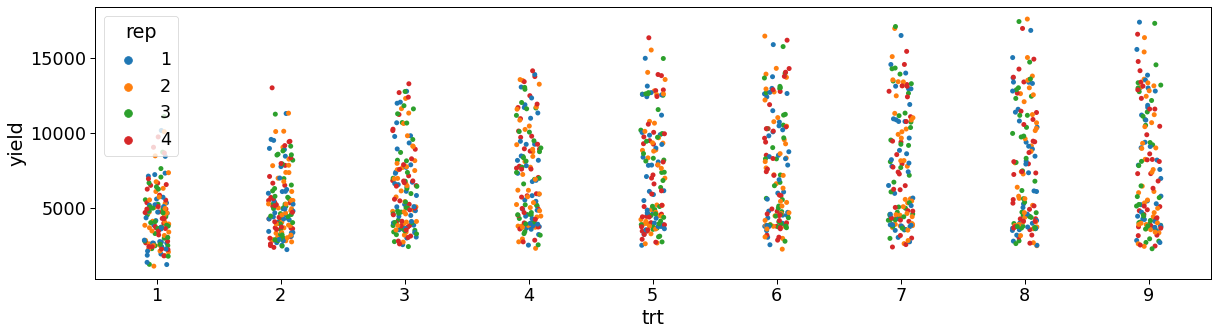

In [18]:
# trt vs yield of different replications
fig_dims = (20, 5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.set_context("paper", font_scale = 2, rc={"grid.linewidth": 1})
b=sns.stripplot(x = "trt", y = "yield",hue="rep", ax=ax, data=data)

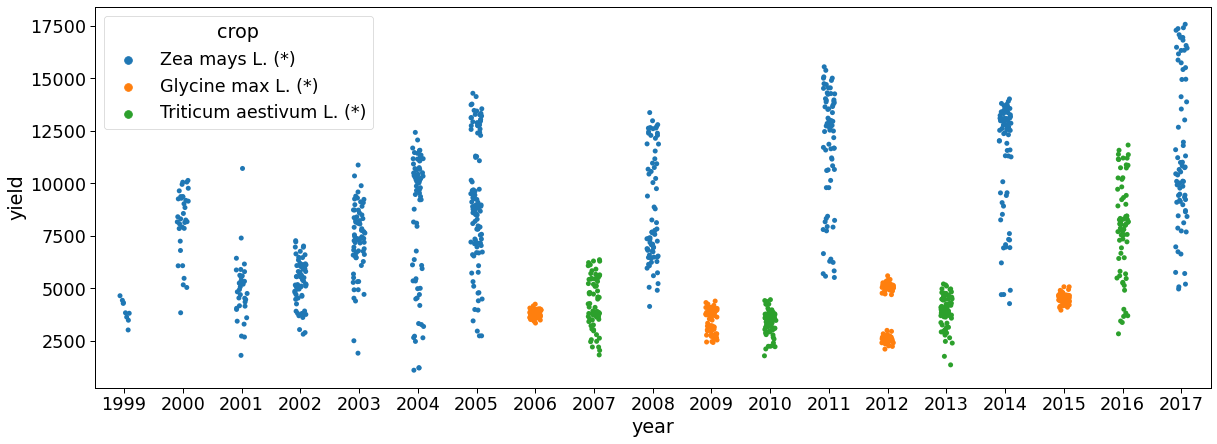

In [19]:
# year vs yield of different crops
fig_dims = (20, 7)
fig, ax = plt.subplots(figsize=fig_dims)
sns.set_context("paper", font_scale = 2, rc={"grid.linewidth": 1})
b=sns.stripplot(x = "year", y = "yield",hue="crop", ax=ax, data=data)

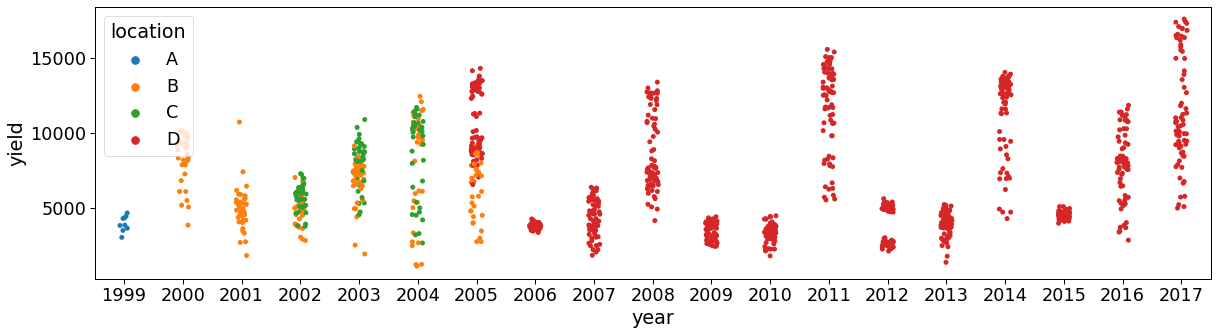

In [20]:
# year vs yield of different locations
fig_dims = (20, 5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.set_context("paper", font_scale = 2, rc={"grid.linewidth": 1})
b=sns.stripplot(x = "year", y = "yield",hue="location", ax=ax, data=data)

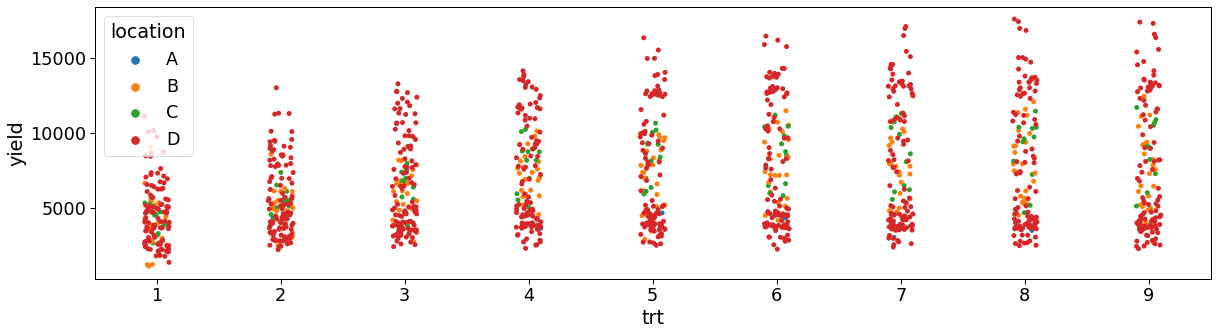

In [21]:
# trt vs yield of different locations
fig_dims = (20, 5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.set_context("paper", font_scale = 2, rc={"grid.linewidth": 1})
b=sns.stripplot(x = "trt", y = "yield",hue="location", ax=ax, data=data)

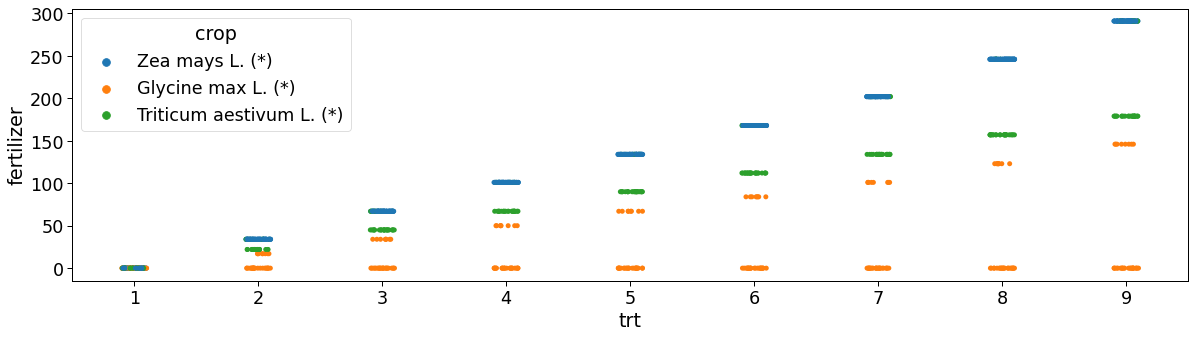

In [22]:
# trt vs fertilizer application for different crops
fig_dims = (20, 5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.set_context("paper", font_scale = 2, rc={"grid.linewidth": 1})
b=sns.stripplot(x = "trt", y = "fertilizer",hue="crop", ax=ax, data=data)

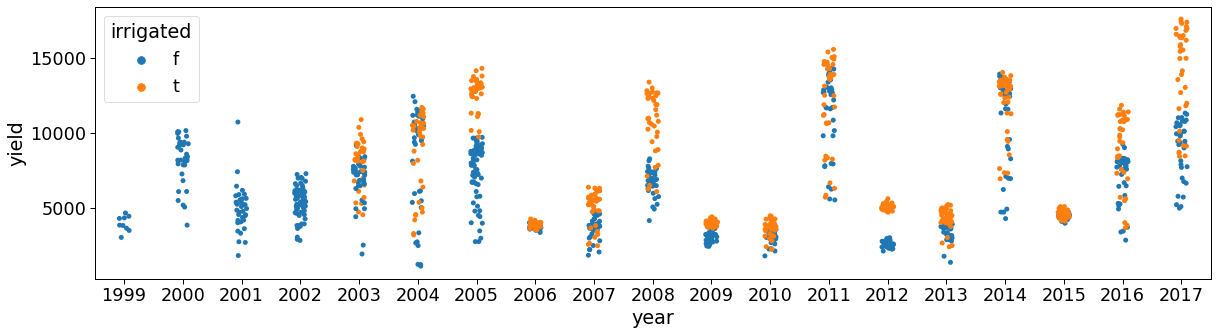

In [23]:
# year vs yield with or without irrigation 
fig_dims = (20, 5)
fig, ax = plt.subplots(figsize=fig_dims)
sns.set_context("paper", font_scale = 2, rc={"grid.linewidth": 1})
b=sns.stripplot(x = "year", y = "yield",hue="irrigated", ax=ax, data=data)

In [24]:
#dummy variable for irrigated

In [25]:
a = pd.get_dummies(data['irrigated'])
data = pd.concat([data, a], axis=1)
data.drop(['irrigated', 'f'], inplace=True, axis=1)
data=data.rename(columns = {'t':'irrigated'})
data.head()

,date,plot,location,trt,rep,fertilizer,crop,yield,year,irrigated
0,1999-10-13,901,A,8,1,246.0,Zea mays L. (*),3482.0,1999,0
1,1999-10-13,902,A,3,1,67.0,Zea mays L. (*),3835.0,1999,0
2,1999-10-13,903,A,7,1,202.0,Zea mays L. (*),3018.0,1999,0
3,1999-10-13,904,A,4,1,101.0,Zea mays L. (*),3632.0,1999,0
4,1999-10-13,905,A,9,1,291.0,Zea mays L. (*),4430.0,1999,0


In [26]:
# Manual labelling for location and crop

In [27]:
nums = {"location":     {"A": 1, "B": 2, "C": 3, "D": 4},
                "crop": {"Zea mays L. (*)": 1, "Glycine max L. (*)": 2, "Triticum aestivum L. (*)": 3}}

In [28]:
data = data.replace(nums)
data.head()

,date,plot,location,trt,rep,fertilizer,crop,yield,year,irrigated
0,1999-10-13,901,1,8,1,246.0,1,3482.0,1999,0
1,1999-10-13,902,1,3,1,67.0,1,3835.0,1999,0
2,1999-10-13,903,1,7,1,202.0,1,3018.0,1999,0
3,1999-10-13,904,1,4,1,101.0,1,3632.0,1999,0
4,1999-10-13,905,1,9,1,291.0,1,4430.0,1999,0


In [29]:
data["location"].value_counts()

4    929
2    213
3    101
1      9
Name: location, dtype: int64

In [30]:
data["crop"].value_counts()

1    683
2    286
3    283
Name: crop, dtype: int64

C:\Users\mails\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\__init__.py:61: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  plot_obj.generate()


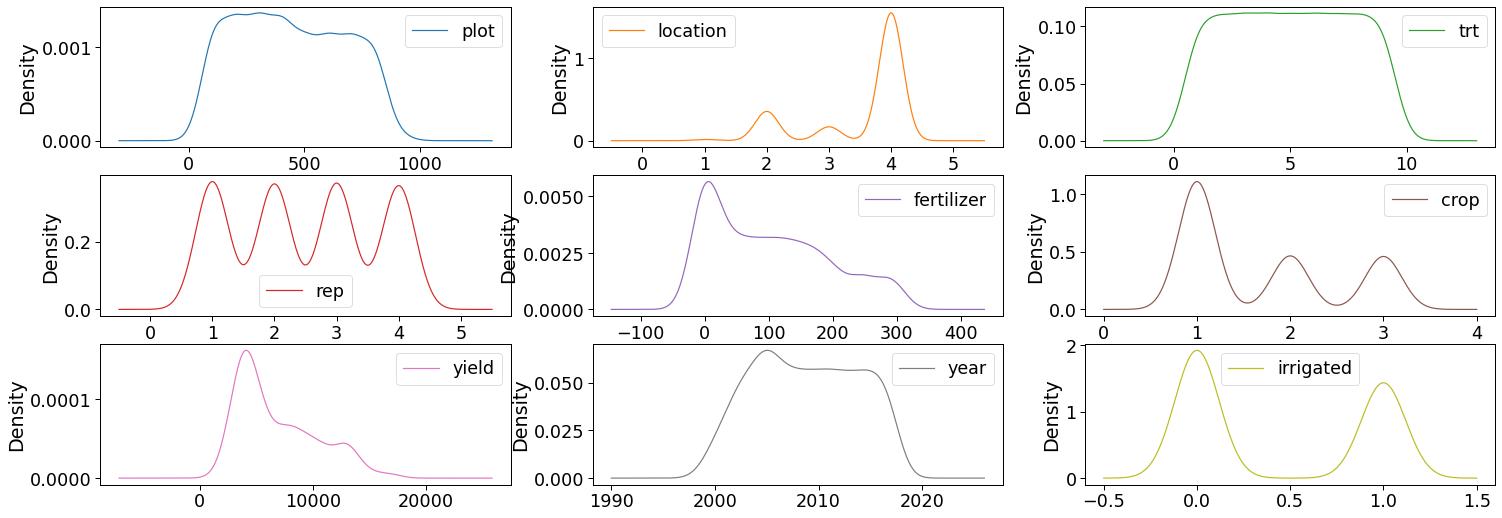

In [31]:
fig_dims = (25, 15)
fig, d = plt.subplots(figsize=fig_dims)
data.plot(kind='density', subplots=True, ax=d,layout=(5,3), sharex=False)
plt.show()

In [32]:
X= data[['location','trt','rep','fertilizer','crop','year','irrigated']]
Y=data[['yield']]

In [33]:
# Correlation between inputs and outputs

In [34]:
corr =data.corr(method='pearson', min_periods=1)
corr.style.background_gradient(cmap='coolwarm')

,plot,location,trt,rep,fertilizer,crop,yield,year,irrigated
plot,1.000000,0.193136,0.004657,0.456910,-0.018462,0.053365,0.174109,0.076463,0.798998
location,0.193136,1.000000,0.006328,0.025926,-0.211809,0.463629,0.040455,0.716429,0.339147
trt,0.004657,0.006328,1.000000,0.001817,0.737240,0.008178,0.276628,0.007742,-0.000086
rep,0.456910,0.025926,0.001817,1.000000,0.000858,0.003080,0.007663,0.013048,-0.000747
fertilizer,-0.018462,-0.211809,0.737240,0.000858,1.000000,-0.255261,0.551229,-0.157679,-0.056031
crop,0.053365,0.463629,0.008178,0.003080,-0.255261,1.000000,-0.532344,0.389036,0.126145
yield,0.174109,0.040455,0.276628,0.007663,0.551229,-0.532344,1.000000,0.137971,0.237242
year,0.076463,0.716429,0.007742,0.013048,-0.157679,0.389036,0.137971,1.000000,0.208120
irrigated,0.798998,0.339147,-0.000086,-0.000747,-0.056031,0.126145,0.237242,0.208120,1.000000


In [35]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [36]:
model = ols('Y ~ C(location) + C(fertilizer) + C(rep) + C(crop) + C(year) + C(irrigated)', data=X).fit()
anova_table = sm.stats.anova_lm(model, typ=3)
anova_table

,sum_sq,df,F,PR(>F)
Intercept,5.028595e+06,1.0,3.080295,7.949963e-02
C(location),4.169237e+08,3.0,85.129669,5.714371e-50
C(fertilizer),2.090550e+09,19.0,67.398862,3.614669e-174
C(rep),1.127938e+06,3.0,0.230308,8.753157e-01
C(crop),6.888174e+08,2.0,210.969544,2.611668e-79
C(year),5.655063e+09,18.0,192.446756,0.000000e+00
C(irrigated),7.180377e+08,1.0,439.838176,1.580088e-83
Residual,1.972065e+09,1208.0,NaN,NaN


In [37]:
# Check the Normal distribution of residuals

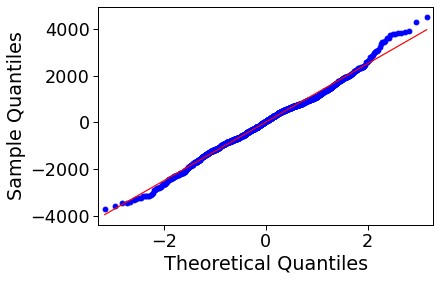

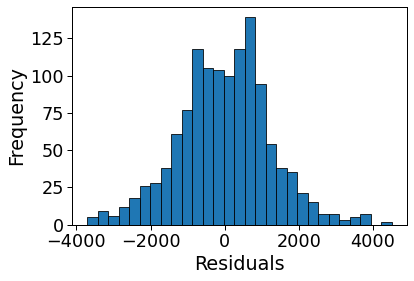

In [38]:
res = sm.stats.anova_lm(model, typ=3)
res

res = model.resid
fig = sm.qqplot(res, line='s')
plt.show()

plt.hist(res, bins='auto', histtype='bar', ec='k') 
plt.xlabel("Residuals")
plt.ylabel('Frequency')
plt.show()

In [39]:
# 7. How does this help farmers? What value does it bring in addition to what already is available